In this first part of the code we dedicate our attention in visualizing how the usual embedding methods work. In the paper *Attention is all you need* the dimension is $512$. Let us denote $x_1,\ldots,x_n$ the input vectors we embedd them in $\mathbb{R}^d$. In order to visualize the structure of the representation of the initial tokens, we are going to use a PCA with $2$ principal components. In this way we project the points in a $2$-dimensional space without loosing much information.



In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

from tqdm.notebook import tqdm
from gensim.models import Word2Vec

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt


In [ ]:
nltk.download('stopwords')
stops = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Experimental material thesis/Articles.csv', encoding="ISO-8859-1")


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2692 entries, 0 to 2691
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Article   2692 non-null   object
 1   Date      2692 non-null   object
 2   Heading   2692 non-null   object
 3   NewsType  2692 non-null   object
dtypes: object(4)
memory usage: 84.2+ KB


In [ ]:
df.head()

,Article,Date,Heading,NewsType
0,KARACHI: The Sindh government has decided to b...,1/1/2015,sindh govt decides to cut public transport far...,business
1,HONG KONG: Asian markets started 2015 on an up...,1/2/2015,asia stocks up in new year trad,business
2,HONG KONG: Hong Kong shares opened 0.66 perce...,1/5/2015,hong kong stocks open 0.66 percent lower,business
3,HONG KONG: Asian markets tumbled Tuesday follo...,1/6/2015,asian stocks sink euro near nine year,business
4,NEW YORK: US oil prices Monday slipped below $...,1/6/2015,us oil prices slip below 50 a barr,business


In [ ]:
df.dropna(inplace = True)

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# tokenize words from text document while removing stop words because they hold no value
def token_helper(doc):
    global stops
    payload = [word.lower() for word in word_tokenize(doc) if word not in stops and word.isalpha()]
    return payload

tokenized_words = [token_helper(art) for art in df.Article.values]

In [ ]:
print(len(tokenized_words)) #we have 2692 articles. We have a list of lists

2692


In [ ]:
print(tokenized_words[1])

['hong', 'kong', 'asian', 'markets', 'started', 'upswing', 'limited', 'trading', 'friday', 'mainland', 'chinese', 'stocks', 'surging', 'hong', 'kong', 'speculation', 'beijing', 'may', 'ease', 'monetary', 'policy', 'boost', 'slowing', 'kong', 'rose', 'percent', 'closing', 'points', 'higher', 'closed', 'percent', 'rising', 'points', 'sydney', 'gained', 'percent', 'points', 'close', 'edged', 'percent', 'gaining', 'points', 'mainland', 'china', 'japan', 'taiwan', 'new', 'zealand', 'philippines', 'thailand', 'remained', 'closed', 'mainland', 'bourses', 'shut', 'january', 'shares', 'chinese', 'developers', 'financial', 'companies', 'surged', 'hong', 'kong', 'stoked', 'hopes', 'beijing', 'could', 'ease', 'monetary', 'policy', 'support', 'lagging', 'growth', 'vanke', 'biggest', 'developer', 'sales', 'leapt', 'percent', 'insurance', 'company', 'group', 'china', 'percent', 'afternoon', 'csr', 'china', 'cnr', 'soared', 'csr', 'percent', 'china', 'cnr', 'percent', 'extending', 'gains', 'december',

Now since we have the corpus and we cleaned the text, we are going to use and visualize different embedding methods to understand how they work

In [ ]:
model = Word2Vec(tokenized_words, min_count=100,vector_size=100, window=10, workers=4)


In [ ]:
embedded_word=model.wv['bank']
#print(embedded_word)
similar_words = model.wv.most_similar('bank', topn=10)  # Let's see the most similar words to bank
print(similar_words)
similar_words_2 = model.wv.most_similar('economy', topn=10)  # Let's see the most similar words to bank
print(similar_words_2)


[('central', 0.9385131001472473), ('banks', 0.8981450796127319), ('monetary', 0.8864920139312744), ('policy', 0.8506388664245605), ('interest', 0.7811278700828552), ('rates', 0.7644057869911194), ('federal', 0.7443793416023254), ('reserve', 0.7361710071563721), ('fund', 0.7361612319946289), ('fed', 0.7207354307174683)]
[('growth', 0.9050292372703552), ('outlook', 0.8983616828918457), ('economic', 0.8593581318855286), ('manufacturing', 0.853124737739563), ('emerging', 0.849542498588562), ('growing', 0.8305612206459045), ('jobs', 0.8229320645332336), ('forecast', 0.7876542806625366), ('trump', 0.7847653031349182), ('financial', 0.7827042937278748)]


In [ ]:
model_words = model.wv.key_to_index.keys()

print("Some words in the model:")
for word in list(model_words)[:10]:
    print(word)

Some words in the model
said
percent
pakistan
first
also
the
strong
last
oil
world


In [ ]:
X = model.wv[model.wv.key_to_index] #the embedding values
pca = PCA(n_components=2)
result = pca.fit_transform(X)
#plotting the results

def generate_plot(emb_word,n,vocab): #where n is the number the number of word and vocab is the vocabulary
  plt.xlabel('PC1')
  plt.ylabel('PC2')
  plt.title('2-dimensional embedding')
  plt.scatter(emb_word[:n,0],emb_word[:n,1])
  for i, word in enumerate(vocab[:n]):
        plt.annotate(word,xy=(emb_word[i,0],emb_word[i,1]))
  plt.show()

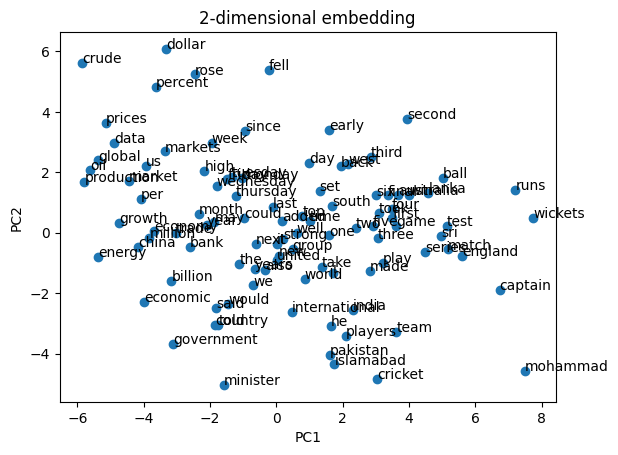

In [ ]:
generate_plot(result,100,list(model.wv.key_to_index))

In [ ]:
#Let us now plot a word and its similar word:
def generate_similar_plot(emb_word,index,vocab):
  plt.xlabel('PC1')
  plt.ylabel('PC2')
  plt.title('2-dimensional embedding')
  plt.scatter(emb_word[index,0],emb_word[index,1])
  for i, word in enumerate(vocab):
        plt.annotate(word,xy=(emb_word[index[i],0],emb_word[index[i],1]))
  plt.show()

similar_words_2 = model.wv.most_similar('economy', topn=10)  # Let's see the most similar words to bank
list_of_words=[similar_words_2[i][0] for i in range(10)]
list_of_words.append('economy')
index=[model.wv.key_to_index[word] for word in list_of_words]

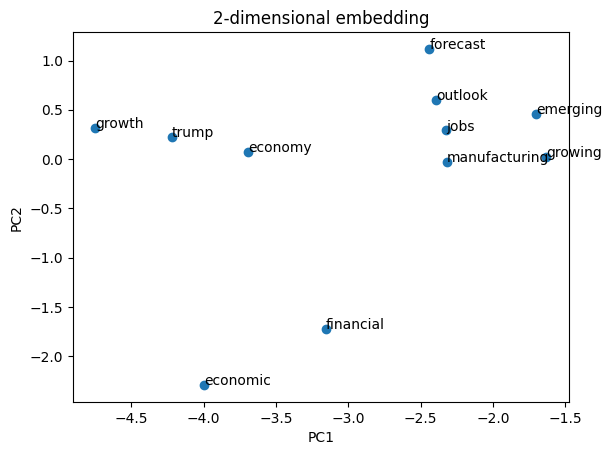

In [ ]:
generate_similar_plot(result,index,list_of_words)

In [ ]:
dissimilar_words_2 = model.wv.most_similar('economy', topn=10, negative=True)
list_of_words_dis=[dissimilar_words_2[i][0] for i in range(10)]
list_of_words_dis.append('economy')
index_dis=[model.wv.key_to_index[word] for word in list_of_words_dis]
generate_similar_plot(result,index_dis,list_of_words_dis)